# E-commerce Customer Segmentation and Prediction

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Customer_Segmentation_/main/customer_segmentation.png" width="1800">

## Introduction

**Project Overview**

This project aims to enhance marketing strategies and customer retention for an e-commerce company by gaining a deeper understanding of their customer base based on their purchasing patter. By leveraging machine learning, the project seeks to segment customers and predict future purchasing behavior. The goal is to develop a robust customer segmentation model and a predictive classifier to categorize customers based on their purchasing patterns, enabling the company to tailor marketing strategies, improve customer retention, and optimize inventory management.

**Project Objective**

Develop a robust customer segmentation model and a predictive classifier to categorize customers based on their purchasing patterns. This will enable the company to tailor marketing strategies, improve customer retention, and optimize inventory management.

**Project Dataset**

- **Description:** Dataset contains customer products buying information.
- **Columns:** Dataset have invoice no, Stock Code, Description, Quantity, Invoice date, Unit price, Customer ID & Country Columns.
- **Purpose:** Used for customer segmentation analysis & retention strategies.
- **Applications:** Customer segmentation analysis, Tailor marketing strategies, Predict customer behavior
- **Analysis Tasks:** Data preprocessing,EDA, ML model building, evaluation, and model deployment.


## Step 1 | Getting Started

Import Necessary Libraries

- **Numpy** for numerical and scientific computing
- **Pandas** for data manipulation & analysis
- **Matplotlib** for data visualization
- **Seaborn** for data visualization & statistical plotting
- **Scikit-Learn** for data training,modeling, machine learning and testing


In [3]:
import numpy as np # For linear Algebra
import pandas as pd # For data processing
import seaborn as sns # For creating plot in seaborn
import matplotlib.pyplot as plt # For creating plot in matplotlib
from sklearn.preprocessing import StandardScaler # For Standardizing Featurers
from sklearn.metrics import silhouette_samples, silhouette_score # For
# validating Clusters
from sklearn.cluster import KMeans # For Kmeans Clusters
from scipy.cluster.hierarchy import linkage # For Hierarchical Linkage
from scipy.cluster.hierarchy import dendrogram # For Plotting Dendrogram
from scipy.cluster.hierarchy import cut_tree # For Hierarchical Clusters
from sklearn.cluster import AgglomerativeClustering # For Agglomerative
# Clustering
from sklearn.cluster import DBSCAN # For DBSCAN Clusters
from sklearn.decomposition import PCA # For Dimentionality Reductions
import plotly.graph_objs as go # For Plotting Global Map
from plotly.offline import init_notebook_mode,iplot # For Plotting Global Map
import plotly.express as px # For creating plot in plotly
import pickle # For Importing trained model
import warnings # For Ignoring Warnings
warnings.filterwarnings("ignore")

## Step 2 | Data Collection

In [ ]:
# Loading the dataset
E_com_cust = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

## Step 3 | Data Preprocessing

### Step 3.1 | Exploratory Data Analysis

In [ ]:
# Checking data is loaded or not
E_com_cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Checking datatype of each column
E_com_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


_Number of Entries__: The dataset consists of __541909  entries__, ranging from index 0 to 541908.
    
    
* __Columns__: There are __8 columns__ in the dataset corresponding to various attributes of the patients and results of tests.
    
    
* __Data Types__:
    - Most of the columns (5 out of 8) are of the __object__ data type.
    - 2 columns are of __float64__ and 1 is __int64__.
    
* __Missing Values__: __Description__ and __Customer ID__ have missing values.

In [ ]:
# Checking Null values percentage
print('Missing Value Presence in different columns of DataFrame are as follows :')
print('-'*100)
total=E_com_cust.isnull().sum()
percent = E_com_cust.isnull().sum()/len(E_com_cust)*100
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows :
----------------------------------------------------------------------------------------------------


,Total,Percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


- **24.93%** of Customer ID is missing. Drop the columns as primary information Customer ID is missing.

In [ ]:
E_com_cust.shape

(541909, 8)

In [ ]:
E_com_cust.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* __`Quantity`__: The average Ordered Quantity of the products is approximately 10 ,

* __`UnitPrice`__: The average Unitprice is about $4.6, ranging from 1 to 38970. Negative value indicates refund order.
* __`Customer ID`__: Customer ID should not float number because Customer ID is unique and should be descrete.


#### Step 3.1.1 | Univariant Analysis

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

>__1. Univariate Analysis__: Here, we'll focus on one feature at a time to understand its distribution and range.
>
>__2. Bivariate Analysis__: In this step, we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome but This dataset does not contain target feature.

With these two steps, we aim to gain insights into the individual characteristics of the data and also how each feature relates to our main goal:

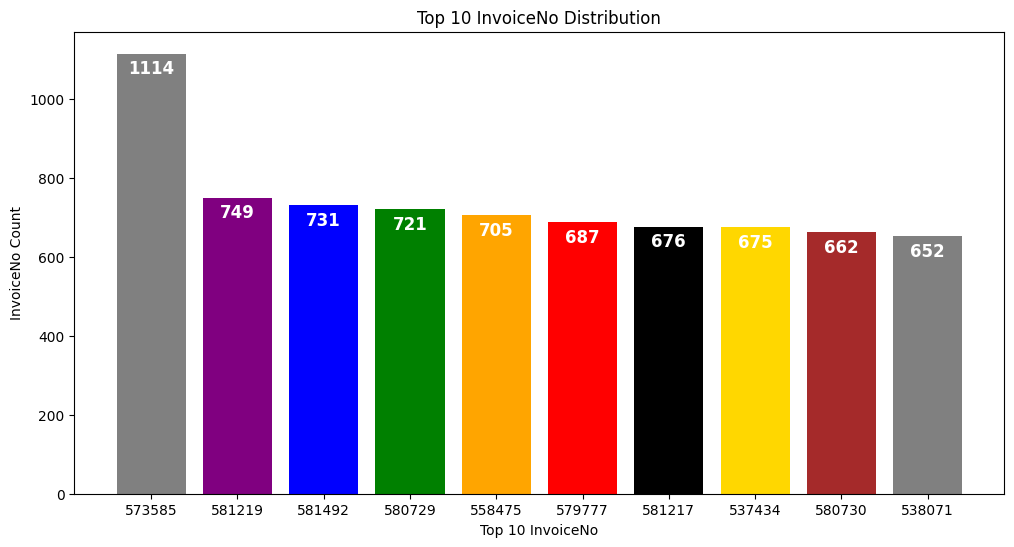

In [ ]:

percentages = E_com_cust['InvoiceNo'].value_counts().nlargest(10)
colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
           'black', 'gold', 'brown', 'grey']

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('InvoiceNo Count')
plt.xlabel('Top 10 InvoiceNo')
plt.title('Top 10 InvoiceNo Distribution')

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:}'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 50.5,  # Position of the text
        percentage,
        fontsize=12,
        color='white',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()


* __InvoiceNo__ : Invoice number indicates how much quantity are ordered by one customer ID.Here are top 10 invoices number.

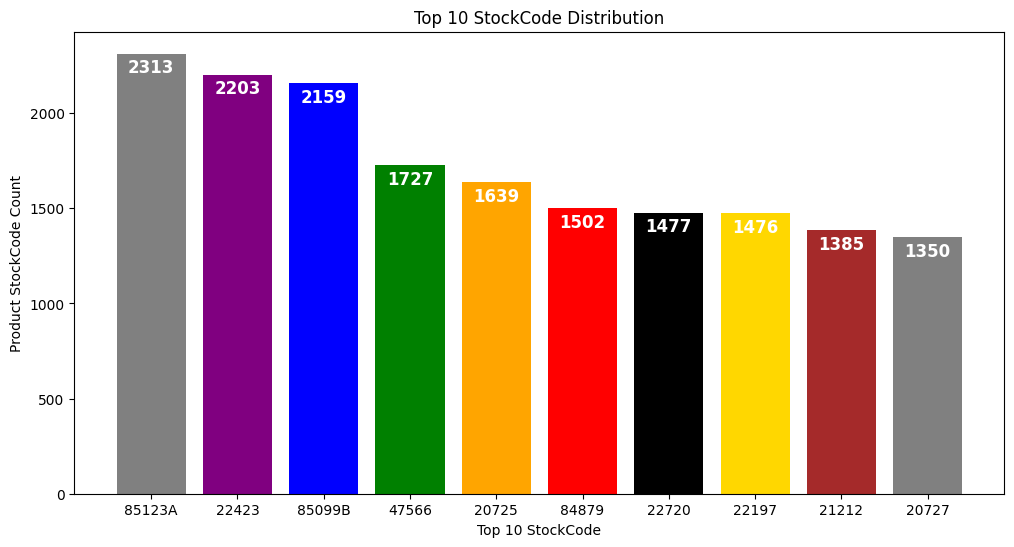

In [ ]:
percentages = E_com_cust['StockCode'].value_counts().nlargest(10)
colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
           'black', 'gold', 'brown', 'grey']

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('Product StockCode Count')
plt.xlabel('Top 10 StockCode')
plt.title('Top 10 StockCode Distribution')

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:}'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 100.5,  # Position of the text
        percentage,
        fontsize=12,
        color='white',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()

* __StockCode__: Stock code is the item number. Here 85123A are on top. it shows us 85123A sold more than others

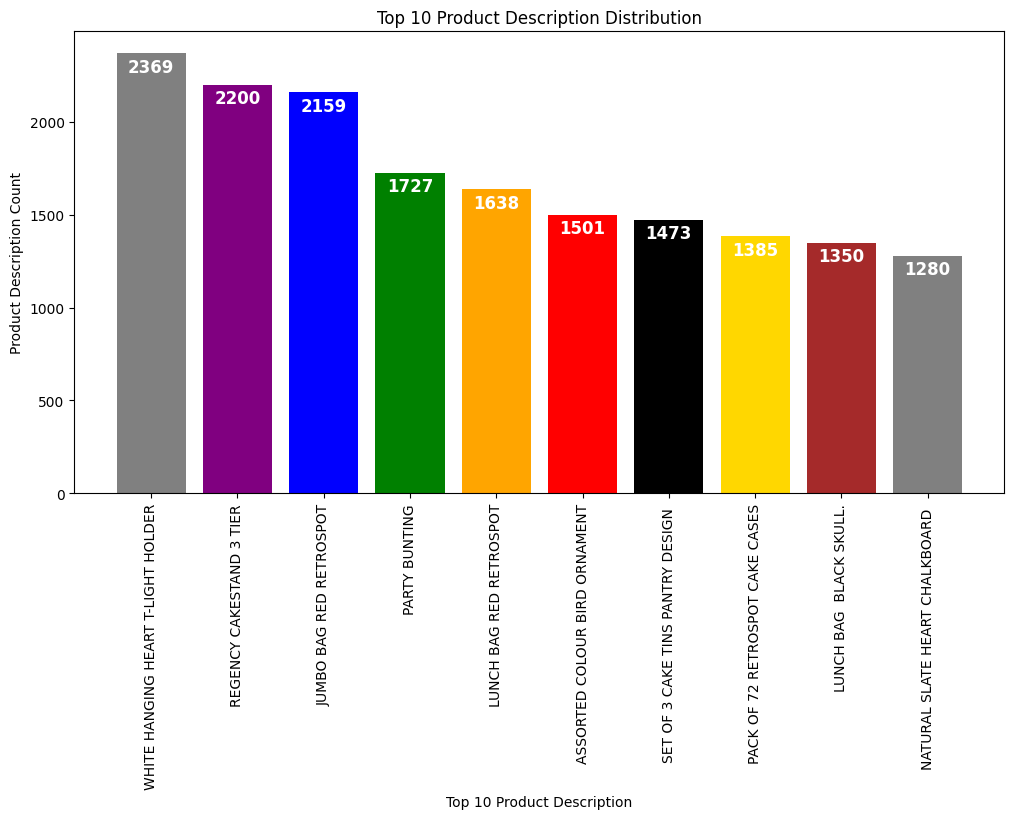

In [ ]:

percentages = E_com_cust['Description'].value_counts().nlargest(10)
colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
           'black', 'gold', 'brown', 'grey']

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('Product Description Count')
plt.xlabel('Top 10 Product Description')
plt.title('Top 10 Product Description Distribution')
plt.xticks(rotation=90)

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:}'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 100.5,  # Position of the text
        percentage,
        fontsize=12,
        color='white',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()


* __Product Description__ : Description indicates about product. Top 10 products are represented here and __White Hanging Heart T-ligh Holder__ sold more than others

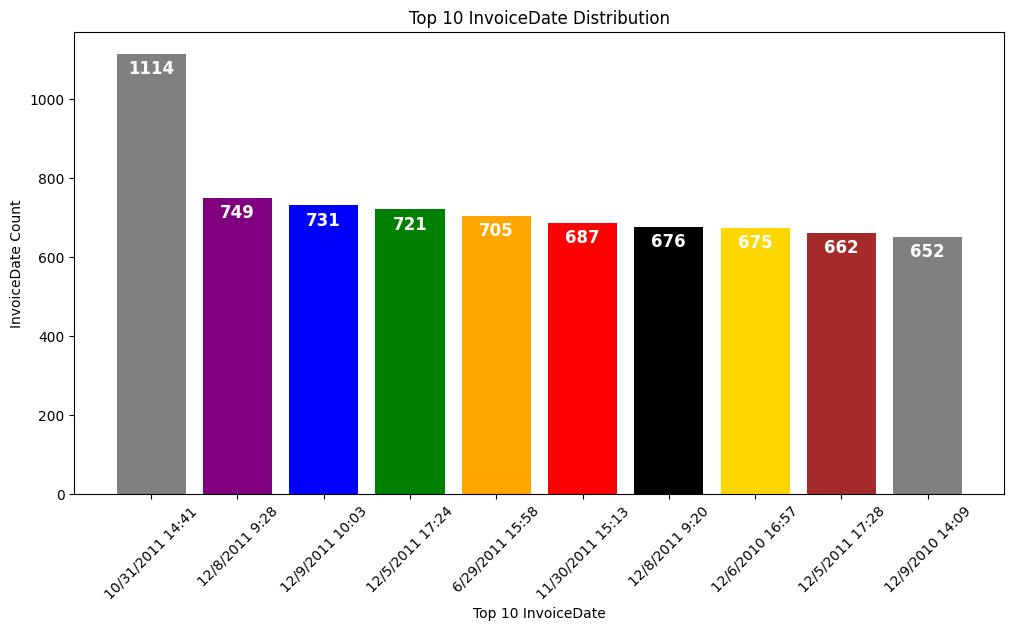

In [ ]:
percentages = E_com_cust['InvoiceDate'].value_counts().nlargest(10)
# = gender_counts * 100.0 / len(gender_counts)
colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
           'black', 'gold', 'brown', 'grey']

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('InvoiceDate Count')
plt.xlabel('Top 10 InvoiceDate')
plt.title('Top 10 InvoiceDate Distribution')
plt.xticks(rotation=45)

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:}'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 50.5,  # Position of the text
        percentage,
        fontsize=12,
        color='White',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()


* __Invoice Date__ : Invoice date are the date of customer ordered from store. Here are top 10 invoice date and __31-oct-2011__ are the most sales recorded.

#### Step 3.1.2 | Bivariant Analysis

In [ ]:
temp = E_com_cust[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Total number of countries: {}'.format(len(countries)))

Total number of countries: 37


In [ ]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],
reversescale = False)
#--------------------
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#--------------------
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

* __Global Map__: This map represents the country based order and most of the order are recorded from __United Kingdom__.

### Step 3.2 | Feature Engineering

In [ ]:
# Checking Refund Orders
(E_com_cust['UnitPrice']<=0).value_counts()

,count
UnitPrice,
False,539392
True,2517


In [ ]:
# Dropping Refund Orders
E_com_cust = E_com_cust[E_com_cust['UnitPrice']>0]

In [ ]:
# Checking Refund Orders
(E_com_cust['Quantity']<=0).value_counts()

,count
Quantity,
False,530104
True,9288


In [ ]:
# Dropping Refund ORders
E_com_cust = E_com_cust[E_com_cust['Quantity']>0]

In [ ]:
# Changing the date data type to datetime format
E_com_cust['InvoiceDate'] = pd.to_datetime(E_com_cust['InvoiceDate'])

In [ ]:
# Changing customer id data type as per requirements
E_com_cust['CustomerID']=E_com_cust['CustomerID'].astype(str)

In [ ]:
# Checking Data Type of Features
E_com_cust.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object


In [ ]:
E_com_cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Step 3.2.1 | RFM Analysis

**Recency Frequency Monetary (RFM) Analysis**

RFM Analysis is a __customer segmentation technique__ used by businesses to better understand and categorize their customers based on their __past purchasing behavior__. This approach helps companies identify and target specific customer groups for marketing and personalization efforts. Here's a breakdown of the three components of RFM Analysis:

1. **Recency (R):** Recency refers to __how recently a customer has made a purchase or interacted with your business__. It is typically measured in terms of __the number of days since the last purchase or interaction__. Customers who have engaged with your business more recently are often considered __more valuable__ because they are more likely to make repeat purchases.

* Example: A customer who made a purchase 3 days
ago is considered more recent than a customer who made a purchase 3 months ago.

2. **Frequency (F):** Frequency measures __how often a customer makes purchases or interacts with your business__ over a specific period such as a year. It represents __customer loyalty and engagement__. Customers who buy from you frequently are more likely to be loyal and responsive to promotions.

* Example: A customer who makes monthly purchases is considered more frequent than a customer who makes annual purchases.

3. **Monetary (M):** Monetary represents __the total amount of money a customer has spent on your products or services__. It helps determine the __value or profitability__ of each customer. Customers who have spent more money are typically considered __high-value customers__.

* Example: A customer who has spent 1,000 dollar with your business is considered more valuable than a customer who has spent 100 dollar.

**Approach behind RFM Analysis**

RFM Analysis involves __scoring or ranking__ customers based on these three dimensions. Each dimension is typically divided into __categories or percentiles__ (e.g. quintiles or deciles) and customers are assigned scores or labels based on where they fall within these categories. For example, you might score recency from 1 to 5, with 5 being the most recent and do the same for frequency and monetary value. Once customers are assigned RFM scores, they can be segmented into different groups. These segments can then be used for various marketing and customer engagement strategies such as:

**Targeted marketing campaigns:** Focus marketing efforts on high RFM-score segments that are more likely to respond positively.

**Customer retention:** Identify at-risk customers (e.g. low frequency or monetary value) and implement strategies to retain them.

**Personalization:** Tailor product recommendations or content to match the preferences and behavior of each segment.

**Product development:** Use RFM insights to inform product or service offerings for different customer segments.


**Real Life Industry Applications**

1. **Retail Industry:**

**Promotion Targeting:** Retailers use RFM segments to identify high-value customers who are more likely to respond positively to discounts and promotions. They can then tailor their marketing campaigns to specifically target these segments.

**Inventory Management:** RFM can help retailers manage inventory by understanding which products are most popular among different customer segments. This information helps optimize stock levels and product placement.

2. **E-commerce:**

**Personalized Recommendations:** Online retailers use RFM data to provide personalized product recommendations to customers based on their past behavior, increasing the likelihood of additional purchases.

**Cart Abandonment Recovery:** RFM can help identify customers who frequently abandon their shopping carts. Retailers can then send targeted follow-up emails or incentives to encourage them to complete their purchases.

3. **Hospitality and Tourism:**

**Customer Loyalty Programs:** Hotels and airlines use RFM analysis to reward loyal customers with special offers, upgrades or discounts thereby encouraging repeat bookings.

**Seasonal Pricing:** Understanding the recency and frequency of bookings allows businesses in this sector to adjust pricing strategies for different seasons and periods of high demand.

4. **Financial Services:**

**Risk Assessment:** Banks and insurance companies use RFM Analysis to assess customer risk. Customers who exhibit erratic behavior in terms of recency, frequency and monetary transactions may be flagged for further review.

**Cross-Selling:** Financial institutions can identify opportunities to cross-sell or upsell products and services to customers based on their RFM profiles.

5. **Subscription Services:**

**Churn Prediction:** Subscription-based businesses like streaming services or SaaS companies use RFM to predict customer churn. They can then take proactive measures to retain customers showing signs of disengagement.

**Tiered Pricing:** Different subscription tiers can be offered to customers based on their RFM scores, ensuring that they receive the level of service that matches their value to the business.

6. **Healthcare:**

**Patient Engagement:** Healthcare providers use RFM to segment patients and tailor communication strategies to encourage regular check-ups or follow-up appointments.

**Medication Adherence:** Understanding the frequency and recency of prescription refills can help healthcare professionals identify patients who may need additional support to adhere to their treatment plans.

7. **Nonprofits and Fundraising:**

**Donor Engagement:** Nonprofit organizations analyze RFM to identify and engage with their most committed donors, helping to optimize fundraising efforts and donor retention.

**Campaign Effectiveness:** Understanding the monetary contributions and recency of donations can help nonprofits assess the success of various fundraising campaigns.

In [ ]:
# Creating Monetary Attribute
E_com_cust['Total Amount'] = E_com_cust['Quantity']*E_com_cust['UnitPrice']
E_com_cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**RFM Attribute Creation**

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

##### Step 3.2.1.1 | New Attribution Creation

New Attribution Creation: Monetary

In [ ]:
RFM_m = E_com_cust.groupby('CustomerID')['Total Amount'].sum()
RFM_m.head()

,Total Amount
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [ ]:
RFM_m = E_com_cust.groupby('CustomerID')['Total Amount'].sum()
RFM_m = RFM_m.reset_index()
RFM_m.columns = ['Customer ID', 'Monetary']
RFM_m.head()

,Customer ID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


New Attribution Creation: Frequecny

In [ ]:
RFM_f = E_com_cust.groupby('CustomerID')['InvoiceNo'].count()
RFM_f = RFM_f.reset_index()
RFM_f.columns = ['Customer ID', 'Frequency']
RFM_f.head()

,Customer ID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
# Merging newly created attribute

RFM_mf = pd.merge(RFM_m,RFM_f, on='Customer ID', how='inner')
RFM_mf.head()

,Customer ID,Monetary,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
min_date = min(E_com_cust['InvoiceDate'])
max_date = max(E_com_cust['InvoiceDate'])
print(min_date,max_date)

2010-12-01 08:26:00 2011-12-09 12:50:00


In [ ]:
# Compute the difference between max date and transaction date

E_com_cust['Diff_Days'] = max_date - E_com_cust['InvoiceDate']
E_com_cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Diff_Days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
E_com_cust['Diff_Days'] = E_com_cust['Diff_Days'].dt.days
E_com_cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Diff_Days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [ ]:
RFM_r = E_com_cust.groupby('CustomerID')['Diff_Days'].min()
RFM_r = RFM_r.reset_index()
RFM_r.columns = ['Customer ID', 'Recency']
RFM_r.head()

,Customer ID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [ ]:
# Merge all the newly created attribute to get the final RFM dataframe

RFM = pd.merge(RFM_mf,RFM_r, on='Customer ID', how='inner')
RFM.columns = ['Customer ID', 'Monetary', 'Frequency', 'Recency']
RFM.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
RFM.shape

(4339, 4)

In [ ]:
E_com_cust['CustomerID'].duplicated().value_counts()

,count
CustomerID,
True,525765
False,4339


In [ ]:
RFM_scores = RFM.copy()

In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


##### Step 3.2.1.2 | RFM Score Assigning

In [ ]:
# Customer's Last purchase score
RFM_scores['Recency_Score'] = pd.qcut(RFM_scores['Recency'],5,labels=[5,4,3,2,1])
# Customer's total purchase score
RFM_scores['Frequency_Score'] = pd.qcut(RFM_scores['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
# Customer wise total spend
RFM_scores['Monetary_Score'] = pd.qcut(RFM_scores['Monetary'],5,labels=[1,2,3,4,5])


In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,77183.60,1,325,1,1,5
1,12347.0,4310.00,182,1,5,5,5
2,12348.0,1797.24,31,74,2,3,4
3,12349.0,1757.55,73,18,4,4,4
4,12350.0,334.40,17,309,1,2,2


- Best Recency score = 5: most recently purchase.
- Best Frequency score = 5: most number of purchase.
- Best Monetary score = 5: spent the most.

We are going to implement __percentile-based grouping__ for each RFM dimension. Later combined label is created using these each RFM dimension.

**Process of calculating percentiles:**

* Sort customers based on that metric

* Break customers into a pre-defined number of groups of equal size

* Assign a label to each group

**Individual RFM dimension label**

For each RFM dimension, assign labels to the categories based on the behavior we want to capture. These labels should be intuitive and provide insight into customer behavior. Here's an example for each dimension:

1. **Recency (R):**

* Label 5: "Very Recent"

* Label 4: "Recent"

* Label 3: "Moderate"

* Label 2: "Infrequent"

* Label 1: "Very Infrequent"

2. **Frequency (F):**

* Label 5: "Very Frequent"

* Label 4: "Frequent"

* Label 3: "Moderate"

* Label 2: "Infrequent"

* Label 1: "Very Infrequent"

3. **Monetary (M):**

* Label 5: "High Spending"

* Label 4: "Above Average Spending"

* Label 3: "Average Spending"

* Label 2: "Below Average Spending"

* Label 1: "Low Spending"

**Combined RFM Labels**

Once we have assigned labels to the categories for each RFM dimension, you can create a __combined RFM label__ for each customer by __concatenating the individual dimension labels or by adding individual dimension scores__. For example:

* If a customer has __R=4, F=5, and M=3__, their combined RFM label would be __"Recent-Very Frequent-Average Spending."__

* We will rate __Recency__ customer who have been active more recently better than the less recent customer,because each company wants its customers to be recent

* We will rate __Frequency and Monetary Value__ higher label because we want Customer to spend more money and visit more often (that is different order than recency).

##### Step 3.2.1.3 | Creating Combined RFM Label

Method-1: By concatenating the individual dimension labels

In [ ]:
RFM_scores['RFM_Score_Segment'] = RFM_scores[
  'Recency_Score'].astype(str)+RFM_scores['Frequency_Score'].astype(
      str)+RFM_scores['Monetary_Score'].astype(str)

In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment
0,12346.0,77183.60,1,325,1,1,5,115
1,12347.0,4310.00,182,1,5,5,5,555
2,12348.0,1797.24,31,74,2,3,4,234
3,12349.0,1757.55,73,18,4,4,4,444
4,12350.0,334.40,17,309,1,2,2,122


Method-2: By adding individual dimension label scores

In [ ]:
RFM_scores['RFM_Score_Sum'] = RFM_scores[[
    'Recency_Score','Frequency_Score','Monetary_Score']].sum(axis=1)


In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum
0,12346.0,77183.60,1,325,1,1,5,115,7
1,12347.0,4310.00,182,1,5,5,5,555,15
2,12348.0,1797.24,31,74,2,3,4,234,9
3,12349.0,1757.55,73,18,4,4,4,444,12
4,12350.0,334.40,17,309,1,2,2,122,5


Note:

- Adding individual score for e.g (2+1+5=8) will create a score between 3 and 15.Here 215 and 512 have same importance where as they represents different segment.

##### Step 3.2.1.4 | Customer *Segmentation* based on RFM Scores

Method-1: Interpeting Customer Segmentation using RFM_Score_Sum


In [ ]:
RFM_scores.groupby(['RFM_Score_Sum']).agg({
  'Recency': 'mean', 'Frequency' : 'mean', 'Monetary':[
      'mean','count']}).round(2)

Recency Frequency  Monetary      
                 mean      mean      mean count
RFM_Score_Sum                                  
3              277.11      6.63    136.25   258
4              205.49     10.96    197.08   254
5              184.98     16.24    294.53   370
6              124.00     19.57    361.53   381
7              105.93     26.72    895.05   391
8               86.42     36.23    625.82   377
9               69.41     46.56    874.70   354
10              57.54     62.45   1117.16   355
11              44.41     81.35   1960.79   331
12              33.10    109.63   1786.12   340
13              22.27    143.31   3107.28   315
14              14.48    231.92   4823.73   306
15               4.29    876.48  17366.35   307

Use RFM_Score_Sum to group customers into Premium, Standard and Normal segments

In [ ]:
def segments(df):
    if df['RFM_Score_Sum'] > 9:
        return 'Premium'
    elif (df['RFM_Score_Sum'] > 5) and (df['RFM_Score_Sum'] <= 9):
        return 'Standard'
    else:
        return 'Normal'

In [ ]:
RFM_scores['Segment Status'] = RFM_scores.apply(segments, axis=1)

In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Status
0,12346.0,77183.60,1,325,1,1,5,115,7,Standard
1,12347.0,4310.00,182,1,5,5,5,555,15,Premium
2,12348.0,1797.24,31,74,2,3,4,234,9,Standard
3,12349.0,1757.55,73,18,4,4,4,444,12,Premium
4,12350.0,334.40,17,309,1,2,2,122,5,Normal


In [ ]:
RFM_scores.groupby(['Segment Status']).agg(
    {'Recency': 'mean', 'Frequency': 'mean','Monetary':[
        'mean','count']}).round(2).sort_values(
        by=('Monetary','count'),ascending=False)

Recency Frequency Monetary      
                  mean      mean     mean count
Segment Status                                 
Premium          30.27    241.33  4830.71  1954
Standard         97.01     31.97   687.48  1503
Normal          217.84     11.91   220.16   882

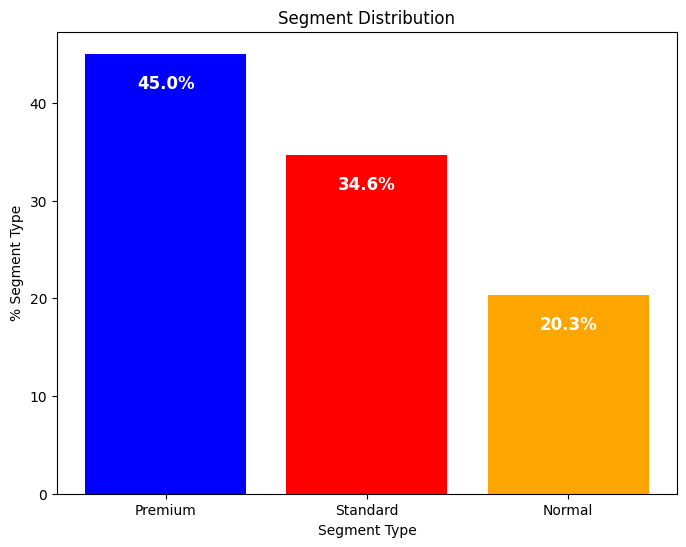

In [ ]:
# Compute percentages
gender_counts = RFM_scores["Segment Status"].value_counts()
percentages = gender_counts * 100.0 / len(RFM_scores)
colors = ['blue', 'red', 'orange']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('% Segment Type')
plt.xlabel('Segment Type')
plt.title('Segment Distribution')

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:.1f}%'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 3.5,  # Position of the text
        percentage,
        fontsize=12,
        color='white',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()


Inference

Premium Customers: 1954

Standard Customers: 1503

Normal Customers: 882

Method-2: Interpeting Customer Segmentation using RFM_Score_Segment

Based on Recency & Frequency Score

* __can't loose them__ → A class of customers who used to shop very frequently but have not shopped for a long time and should not be lost.
* __at risk__ → A class of customers who shop relatively frequently but have not shopped for a long time.
* __hibernating__ → Customers who are literally asleep, both shopped infrequently and have not shopped for a long time.
* __about to sleep__ → A class of customers who do not shop frequently and have not shopped for some time; they are heading towards sleep.
* __need attention__ → This is the class of customers in the middle of the RF graph (33%),
moving towards the risky group if not addressed.
* __new customers__ → A class of customers who have not shopped frequently (maybe once) and have been shopping for a short period of time, they are considered as new customers.
* __promising__ → New customers are the aged version of new customers :) they are customers who have not shopped frequently and have shopped for a short period of time.
* __potential loyalists__ → Customers who shop moderately often and it has not been long since their last purchase.
* __loyal customers__ → Customers who shop very often and it has been a short time since their last purchase.
* __champions__ → They are our champions, our crown jewels! Customers who shop very often and have made their last purchase within a very short period of time.

\\

In [ ]:
segment_mapping = {r'[1-2][1-2][1-5]': 'Hibernating',
                   r'[1-2][3-4][1-5]': 'At Risk',
                   r'[1-2][5][1-5]': 'Can\'t Loose',
                   r'[3][1-2][1-5]': 'About to Sleep',
                   r'[3][3][1-5]': 'Need Attention',
                   r'[3-4][4-5][1-5]': 'Loyal Customers',
                   r'[4][1][1-5]': 'Promising',
                   r'[5][1][1-5]': 'New Customers',
                   r'[4-5][2-3][1-5]': 'Potential Loyalists',
                   r'[5][4-5][1-5]': 'Champions'
                  }

In [ ]:
RFM_scores['Segment'] = RFM_scores['RFM_Score_Segment'].replace(
    segment_mapping, regex=True)

In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Status,Segment
0,12346.0,77183.60,1,325,1,1,5,115,7,Standard,Hibernating
1,12347.0,4310.00,182,1,5,5,5,555,15,Premium,Champions
2,12348.0,1797.24,31,74,2,3,4,234,9,Standard,At Risk
3,12349.0,1757.55,73,18,4,4,4,444,12,Premium,Loyal Customers
4,12350.0,334.40,17,309,1,2,2,122,5,Normal,Hibernating


In [ ]:
RFM_scores.groupby(['Segment']).agg(
    {'Customer ID': 'count'}
).sort_values(by='Customer ID',ascending=False)

,Customer ID
Segment,
Hibernating,1050
Loyal Customers,827
Champions,608
At Risk,577
Potential Loyalists,506
About to Sleep,321
Need Attention,207
Promising,107
Can't Loose,81


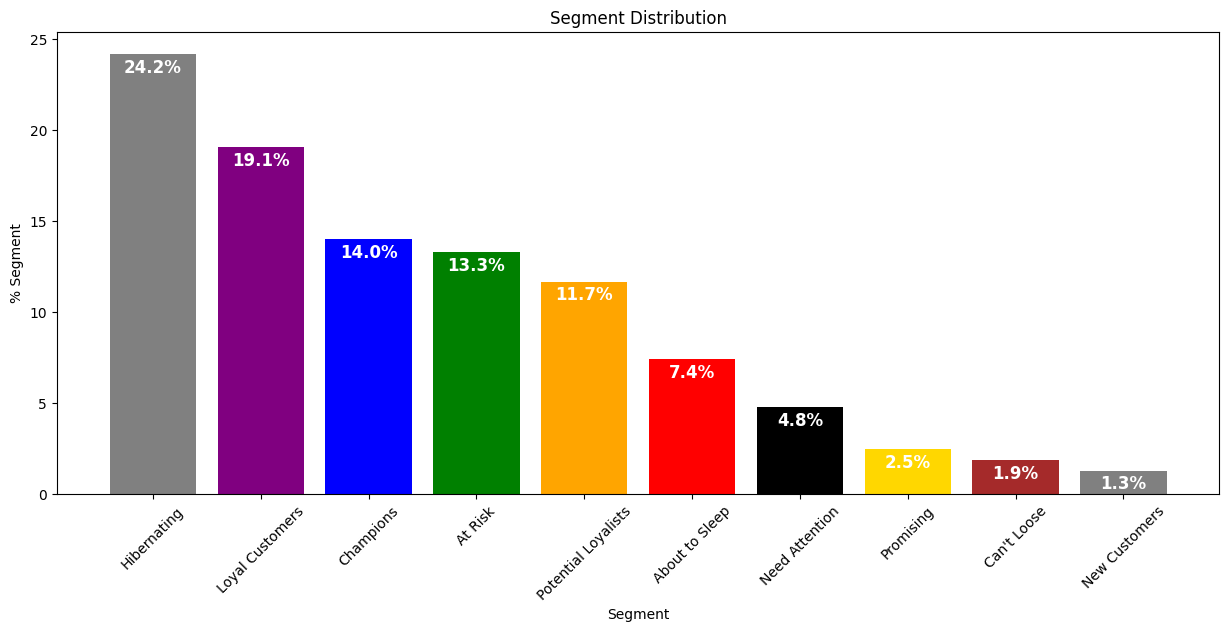

In [ ]:
# Compute percentages
gender_counts = RFM_scores["Segment"].value_counts()
percentages = gender_counts * 100.0 / len(RFM_scores)
colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
           'black', 'gold', 'brown', 'grey']

# Plot
plt.figure(figsize=(15,6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('% Segment')
plt.xlabel('Segment')
plt.title('Segment Distribution')
plt.xticks(rotation=45)

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:.1f}%'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 1,  # Position of the text
        percentage,
        fontsize=12,
        color='white',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()


In [ ]:
RFM_scores[["Segment", "Recency","Frequency","Monetary"]].groupby(
    "Segment").agg(["mean","count","max"]).round().sort_values(
        by=("Recency","mean"),ascending=True)

Recency            Frequency               Monetary        \
                       mean count  max      mean count     max     mean count   
Segment                                                                         
Champions               5.0   608   12     506.0   608  132220   9826.0   608   
New Customers           6.0    55   10       7.0    55      13   3742.0    55   
Potential Loyalists    15.0   506   32      34.0   506      58    900.0   506   
Promising              22.0   107   32       7.0   107      14    433.0   107   
Loyal Customers        33.0   827   71     156.0   827    1204   2826.0   827   
Need Attention         52.0   207   71      41.0   207      58    848.0   207   
About to Sleep         53.0   321   71      16.0   321      29    475.0   321   
Can't Loose           145.0    81  371     182.0    81     543   2394.0    81   
At Risk               166.0   577  373      56.0   577     119    985.0   577   
Hibernating           210.0  1050  373      13.0  1050      29    531.0  1050   

                                
                           max  
Segment                         
Champions            1755277.0  
New Customers         168472.0  
Potential Loyalists    26879.0  
Promising               6749.0  
Loyal Customers       124915.0  
Need Attention         11582.0  
About to Sleep          7331.0  
Can't Loose            10254.0  
At Risk                11073.0  
Hibernating            77184.0

Method-3: Interpeting Customer Segmentation using RFM_Score_Segment


In [ ]:
# Mapping Segment as per all three RFM dimension

segment_mapping1 = {r'[4-5][4-5][4-5]': 'Best Customers',
                   r'[1-5][4-5][1-5]': 'Loyal Customers',
                   r'[1-5][1-5][4-5]': 'Big Spenders',
                   r'[2-3][1-5][1-5]': 'Almost Lost',
                   r'[1][1-5][1-5]': 'Lost Customers',
                   r'[4-5][1-3][1-3]': 'Recent Active Low Spender',
                  }

In [ ]:
RFM_scores['Segment new'] = RFM_scores['RFM_Score_Segment'].replace(
    segment_mapping1, regex=True)

In [ ]:
RFM_scores.groupby(['Segment new']).agg(
    {'Customer ID': 'count'}
).sort_values(by='Customer ID',ascending=False)

,Customer ID
Segment new,
Almost Lost,982
Best Customers,933
Loyal Customers,803
Lost Customers,731
Recent Active Low Spender,523
Big Spenders,367


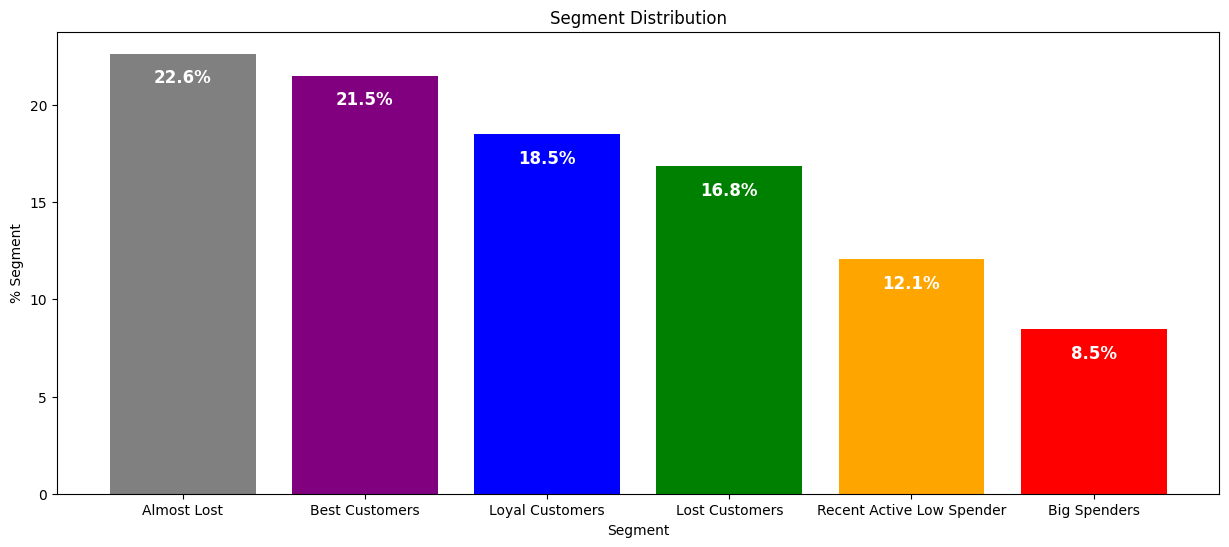

In [ ]:
# Compute percentages
gender_counts = RFM_scores["Segment new"].value_counts()
percentages = gender_counts * 100.0 / len(RFM_scores)
colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
           'black', 'gold', 'brown', 'grey']

# Plot
plt.figure(figsize=(15,6))
bars = plt.bar(percentages.index, percentages, color=colors)

# Set labels and title
plt.ylabel('% Segment')
plt.xlabel('Segment')
plt.title('Segment Distribution')
#plt.xticks(rotation=45)

# Add labels on bars - optional (to add the text on the bars)
for bar in bars:
    height = bar.get_height()
    percentage = f'{height:.1f}%'
    plt.text(
        bar.get_x() + bar.get_width() / 2, height - 1.5,  # Position of the text
        percentage,
        fontsize=12,
        color='white',
        weight='bold',
        ha='center'
    )

# Display the plot
plt.show()


In [ ]:
RFM_scores.head()

,Customer ID,Monetary,Frequency,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score_Segment,RFM_Score_Sum,Segment Status,Segment,Segment new
0,12346.0,77183.60,1,325,1,1,5,115,7,Standard,Hibernating,Big Spenders
1,12347.0,4310.00,182,1,5,5,5,555,15,Premium,Champions,Best Customers
2,12348.0,1797.24,31,74,2,3,4,234,9,Standard,At Risk,Big Spenders
3,12349.0,1757.55,73,18,4,4,4,444,12,Premium,Loyal Customers,Best Customers
4,12350.0,334.40,17,309,1,2,2,122,5,Normal,Hibernating,Lost Customers


In [ ]:
RFM_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Customer ID        4339 non-null   object  
 1   Monetary           4339 non-null   float64 
 2   Frequency          4339 non-null   int64   
 3   Recency            4339 non-null   int64   
 4   Recency_Score      4339 non-null   category
 5   Frequency_Score    4339 non-null   category
 6   Monetary_Score     4339 non-null   category
 7   RFM_Score_Segment  4339 non-null   object  
 8   RFM_Score_Sum      4339 non-null   int64   
 9   Segment Status     4339 non-null   object  
 10  Segment            4339 non-null   object  
 11  Segment new        4339 non-null   object  
dtypes: category(3), float64(1), int64(3), object(5)
memory usage: 318.5+ KB


In [ ]:
RFM_scores.describe()

,Monetary,Frequency,Recency,RFM_Score_Sum
count,4.339000e+03,4339.000000,4339.000000,4339.000000
mean,2.458328e+03,122.171929,91.515326,9.015902
std,2.809265e+04,2018.863821,100.012295,3.573889
min,3.750000e+00,1.000000,0.000000,3.000000
25%,3.074300e+02,17.000000,17.000000,6.000000
50%,6.745200e+02,41.000000,50.000000,9.000000
75%,1.662060e+03,100.000000,141.000000,12.000000
max,1.755277e+06,132220.000000,373.000000,15.000000


Customers are distributed segments wise premium,standard & Normal. Premium customers are more than others

Customers are segregated in different segments for accurately targeting them

### Step 3.3 | Outliers Handling

In [ ]:
# Lets Look the RFM data head
RFM.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
RFM.describe()

,Monetary,Frequency,Recency
count,4.339000e+03,4339.000000,4339.000000
mean,2.458328e+03,122.171929,91.515326
std,2.809265e+04,2018.863821,100.012295
min,3.750000e+00,1.000000,0.000000
25%,3.074300e+02,17.000000,17.000000
50%,6.745200e+02,41.000000,50.000000
75%,1.662060e+03,100.000000,141.000000
max,1.755277e+06,132220.000000,373.000000


In [ ]:
RFM.shape

(4339, 4)

In [ ]:
RFM.isnull().sum()

,0
Customer ID,0
Monetary,0
Frequency,0
Recency,0


 **Outlier** is an observation in a given dataset that lies far from the rest of the observations. That means an outlier treatment is vastly larger or smaller than the remaining values in the set.


Identifying and Handling Outliers


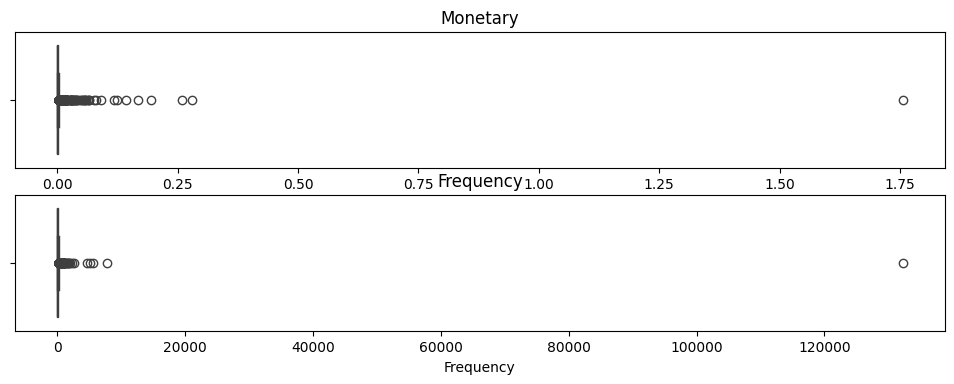

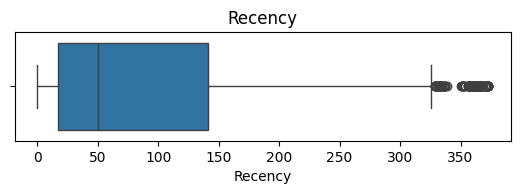

In [ ]:
# Outlier Handling

## Identifying Outliers
print("\nIdentifying and Handling Outliers")

# Visualize the distribution of RFM
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
sns.boxplot(x= RFM['Monetary'])
plt.title('Monetary')


plt.subplot(3, 1, 2)
sns.boxplot(x = RFM['Frequency'])
plt.title('Frequency')
plt.show()

plt.subplot(3, 1, 3)
sns.boxplot(x = RFM['Recency'])
plt.title('Recency')
plt.show()



Identifying and Handling Outliers


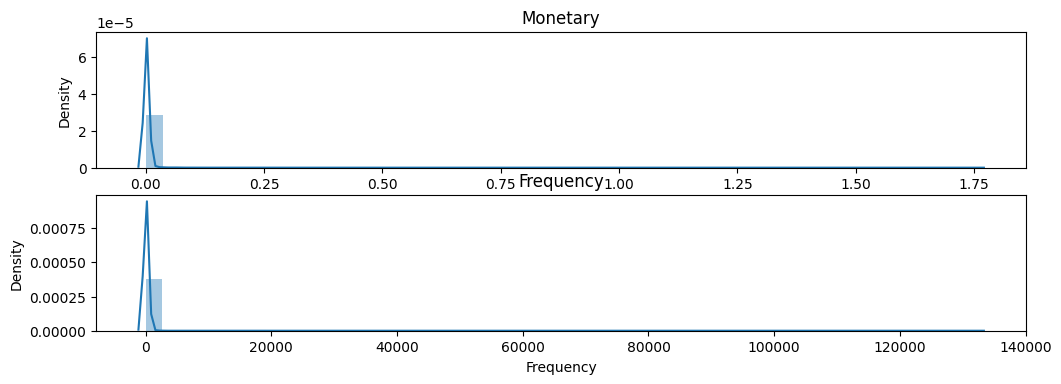

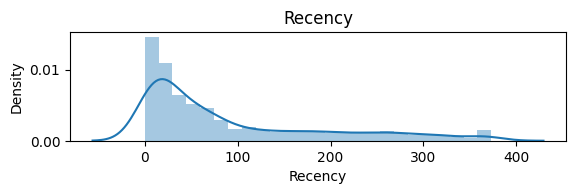

In [ ]:
# Outlier Handling

## Identifying and Handling Outliers
print("\nIdentifying and Handling Outliers")

# Visualize the distribution of 'RFM'
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
sns.distplot(RFM['Monetary'])
#sns.histplot(data= RFM['Monetary'],kde=True,edgecolor='none', color='red',
            # alpha=0.6, line_kws={'lw': 3})
plt.title('Monetary')

plt.subplot(3, 1, 2)
sns.distplot(RFM['Frequency'])
plt.title('Frequency')
plt.show()

plt.subplot(3, 1, 2)
sns.distplot(RFM['Recency'])
plt.title('Recency')
plt.show()

features are right skewed. it needs to be normally distributed. Let's try to remove outliers for making normally distributed

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = RFM.Monetary.quantile(0.25)
Q3 = RFM.Monetary.quantile(0.75)
IQR = Q3 - Q1
RFM_outliers = RFM[(RFM.Monetary>= Q1 - 1.5*IQR) & (
    RFM.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM_outliers = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (
    RFM.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM_outliers = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (
    RFM.Frequency <= Q3 + 1.5*IQR)]

Outliers Removing from RFM data

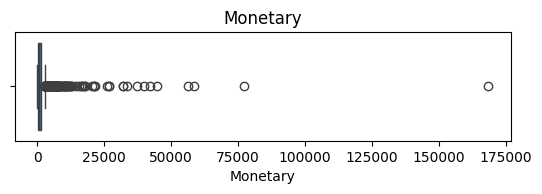

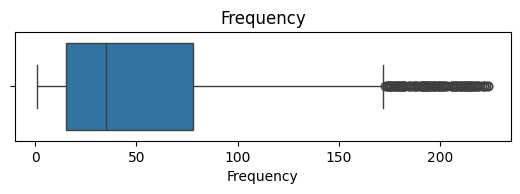

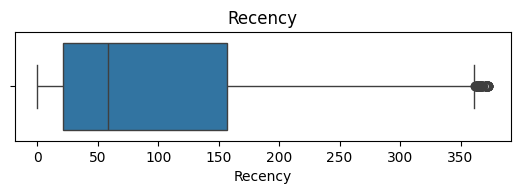

In [ ]:
plt.subplot(3, 1, 1)
sns.boxplot(x = RFM_outliers['Monetary'])
plt.title('Monetary')
plt.show()

plt.subplot(3, 1, 2)
sns.boxplot(x = RFM_outliers['Frequency'])
plt.title('Frequency')
plt.show()

plt.subplot(3, 1, 2)
sns.boxplot(x = RFM_outliers['Recency'])
plt.title('Recency')
plt.show()

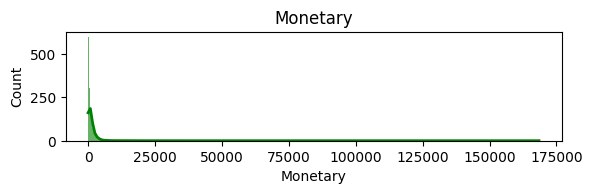

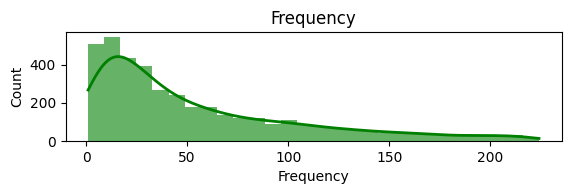

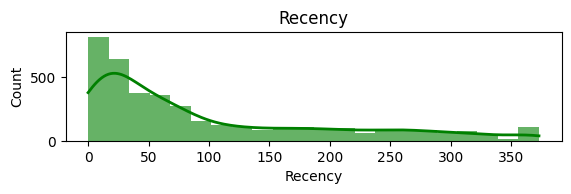

In [ ]:
plt.subplot(3, 1, 1)
sns.histplot(data= RFM_outliers['Monetary'],kde=True,edgecolor='none',
             color='Green',alpha=0.6, line_kws={'lw': 2})
plt.title('Monetary')
plt.show()

plt.subplot(3, 1, 2)
sns.histplot(data= RFM_outliers['Frequency'],kde=True,edgecolor='none',
             color='Green',alpha=0.6, line_kws={'lw': 2})
plt.title('Frequency')
plt.show()

plt.subplot(3, 1, 2)
sns.histplot(data= RFM_outliers['Recency'],kde=True,edgecolor='none',
             color='Green',alpha=0.6, line_kws={'lw': 2})
plt.title('Recency')
plt.show()

Skewness are not vanished after removing outliers

In [ ]:
RFM_outliers.shape

(3958, 4)

In [ ]:
RFM_outliers.max()

,0
Customer ID,18287.0
Monetary,168472.5
Frequency,224
Recency,373


In [ ]:
condition = RFM_outliers['Monetary'] == 168472.5
row_position = RFM_outliers[condition].index[0]

In [ ]:
df = RFM_outliers.drop(index=row_position, inplace= True)

In [ ]:
RFM_outliers.max()

,0
Customer ID,18287.0
Monetary,77183.6
Frequency,224
Recency,373


### Step 3.4 | Feature Scaling

In [ ]:
# Creating DataFrame fo scaling
RFM_normalization = RFM_outliers[['Recency','Frequency','Monetary']]
RFM_normalization.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


**Feature scaling** is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
# Scaling the features for model training
scaler = StandardScaler()
scaler.fit(RFM_normalization)
#Store it separately for clustering
RFM_normalized = scaler.transform(RFM_normalization)

In [ ]:
RFM_normalized = pd.DataFrame(RFM_normalized,
 columns=RFM_normalization.columns).round(2)
RFM_normalized.head()

,Recency,Frequency,Monetary
0,2.23,-1.04,26.04
1,-0.96,2.50,1.06
2,-0.24,-0.45,0.20
3,-0.79,0.37,0.18
4,2.07,-0.72,-0.30


### Step 3.5 | Dimensionality reduction






Principal component analysis (PCA) is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

**How Do You Do a Principal Component Analysis?**

1. Standardize the range of continuous initial variables.

2. Compute the covariance matrix to identify correlations.

3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components.

4. Create a feature vector to decide which principal components to keep.

5. Recast the data along the principal components axes

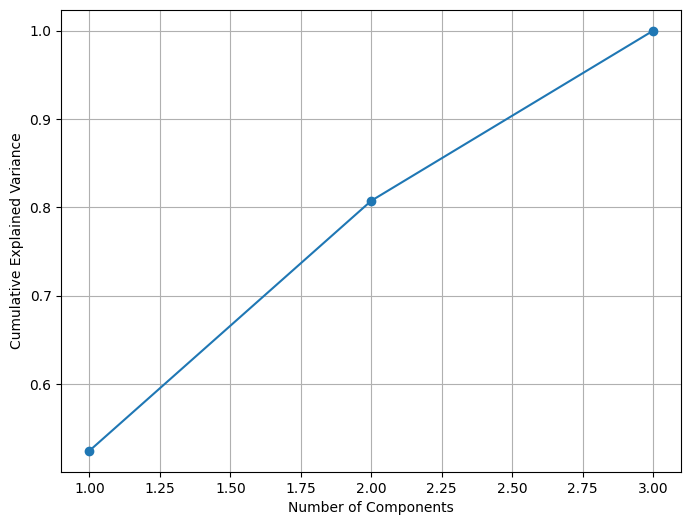

In [ ]:
pca = PCA().fit(RFM_normalized)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

Highest variance calculated at 3 components but it is on 100%. 2 components at 80% variance would be more satisfied

In [ ]:
# Fitting PCA for model training
pca = PCA(n_components=2)
pca.fit(RFM_normalized)
RFM_PCA = pca.transform(RFM_normalized)

## Step 4 | Model Training

#### Step 4.1 | K-Means Clustering Model

Steps Involved in Elbow Criteria Method

1. **Within-Cluster Sum-of-Squared-Errors (SSE):** The SSE is a measure of the variability within each cluster. It is calculated as the sum of the squared distances between each data point and the center of its assigned cluster. In K-Means clustering, the goal is to __minimize the SSE__ because it indicates that data points within each cluster are close to each other.

2. **Plotting the Number of Clusters vs. SSE:** To determine the optimal number of clusters, we can perform K-Means clustering with different values of k (the number of clusters) and calculate the SSE for each value of k. We then plot the number of clusters (k) on the x-axis and the corresponding SSE on the y-axis.

3. **Identifying the Elbow Point:** When we plot the SSE against the number of clusters, we often observe a pattern where the SSE decreases as the number of clusters increases. However, at some point, adding more clusters starts to have diminishing returns in terms of reducing SSE. The point where the rate of decrease sharply changes, forming an elbow in the plot is often considered the optimal number of clusters.

* Before the elbow point, adding more clusters significantly reduces SSE, indicating that the clusters are too large, and data points are far from their cluster centers.

* After the elbow point, adding more clusters has less impact on reducing SSE, suggesting that the clusters are becoming too granular, and overfitting may occur.

**Choosing Number of Clusters**

Methods to define the number of Clusters

1. Visual Method: Elbow Criteria

2. Mathematical Method: Silhouette Coefficient

3. Experimentation and Interpretation

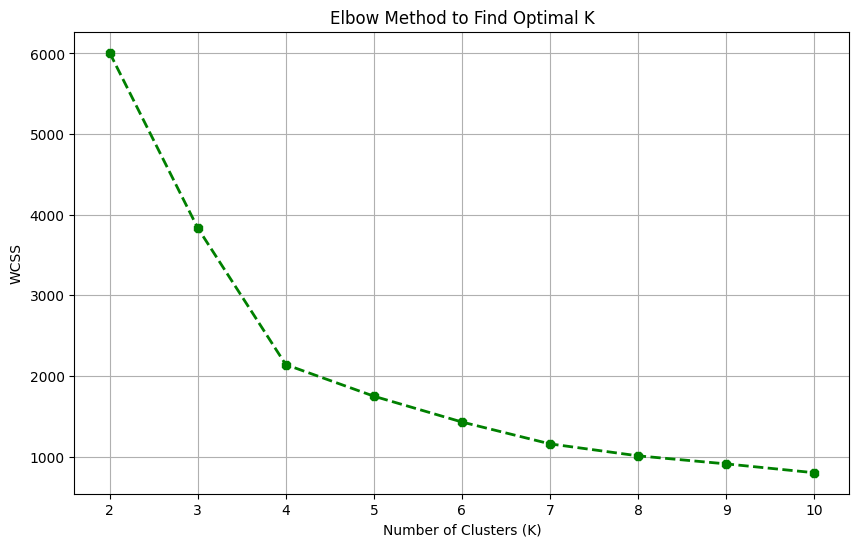

In [ ]:
## Elbow method To select K Value
wcss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(RFM_PCA)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(2,11),wcss,linewidth=2,color="green",marker="8",linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()


From the Elbow Curve, we found that optimal number of clusters (n_clusters) is 4


KneeLocator identifies the knee/elbow point

In [ ]:
## kneelocator
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl=KneeLocator(range(2,11),wcss,curve="convex",direction="decreasing")
kl.elbow

4

From the Elbow Curve, we found that optimal number of clusters (n_clusters) is 4

The __silhouette coefficient__ is a metric used to evaluate how well data points are clustered together. It's a value between -1 and 1, with higher values indicating better clustering.

* **Close to +1:** The data points are well-separated from other clusters .

* **Close to 0:** The clusters overlap.

* **Close to -1:** The data points are misclassified.

The silhouette coefficient is calculated using the following formula:
 \((b-a)/max(a,b)\)

 \(a\):The average distance between data points within a cluster.

 \(b\): The average distance between data points in different clusters.

In [ ]:
## silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(RFM_PCA)
    score=silhouette_score(RFM_PCA,kmeans.labels_)
    silhouette_coefficients.append(score)


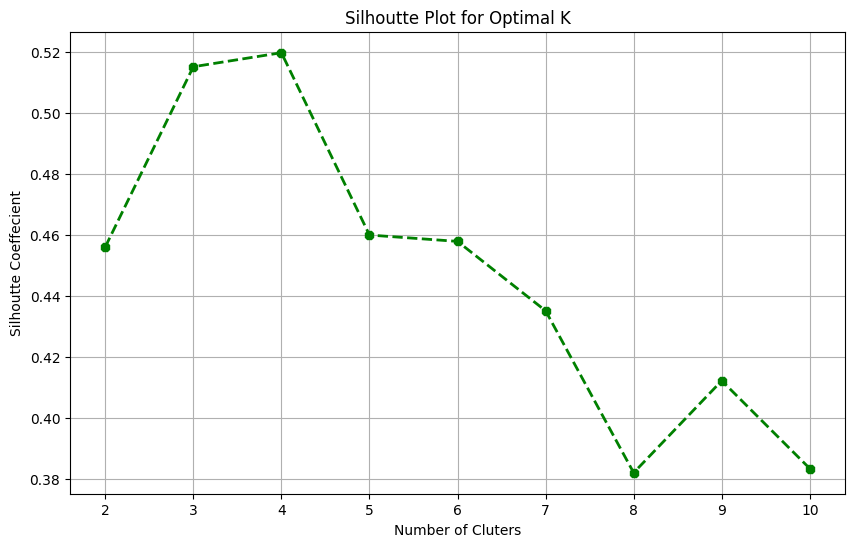

In [ ]:
## plotting silhouette score

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(2,11),silhouette_coefficients,linewidth=2,color="green"
,marker="8",linestyle='--')
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.title("Silhoutte Plot for Optimal K")
plt.show()

From Silhouette Score Analysis for different clusters, we found that optimal number of cluster(n_clusters) is 4.

K-Means clustering is a popular __unsupervised machine learning algorithm__ used for clustering data points into groups or clusters. In order to apply K-Means, we must check if the key assumptions of K-Means Clustering are followed.

Key Assumptions of K-Means

1. __Symmetric Distribution of Variables (Not Skewed):__ K-Means assumes that the variables have a __roughly symmetric distribution and are not heavily skewed__. This is because K-Means uses the mean (centroid) of data points within a cluster to define the cluster center. If the data is highly skewed with a long tail on one side, the mean may not be a representative measure of central tendency and K-Means may not perform well. In such cases, you may need to consider data transformation techniques to make the data more symmetric.

2. __Variables with Same Average Values:__ K-Means assumes that the variables have __similar means__. If the variables have significantly different average values, it can lead to unequal contributions of variables to the distance calculation between data points which can impact the clustering results. __Standardizing or scaling__ the variables (e.g. using z-score normalization) can help address this issue by giving all variables equal importance.

3. __Variables with Same Variance:__ K-Means also assumes that the variables have __roughly equal variances__. Variables with different variances can disproportionately affect the distance calculations because K-Means uses the Euclidean distance metric which is sensitive to the scale of the variables. Again, standardizing or scaling the variables can help mitigate this problem.

In [ ]:
# Clustering for final model
K_Means_final_model = KMeans(n_clusters=4,init="k-means++")
K_Means_final_model.fit(RFM_PCA)

KMeans(n_clusters=4)

In [ ]:
#Create a cluster label column in the original DataFrame
KMeans_cluster = K_Means_final_model.labels_
KMeans_cluster

array([3, 2, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
# Finding Silhouette score to validate clustering
silhouette_score(RFM_PCA, K_Means_final_model.fit_predict(RFM_PCA))

0.5192436201515225

0.51 is least score, This indicates that data points are not well separated from other clusters.it can increase close to +1 but cluster will decrease, this is not suitable for segmentation since Customer will not segregate properly

In [ ]:
# Creating Kmeans cluster column
RFM_outliers['KMeans Cluster'] = KMeans_cluster
RFM_outliers.head()

,Customer ID,Monetary,Frequency,Recency,KMeans Cluster
0,12346.0,77183.60,1,325,3
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


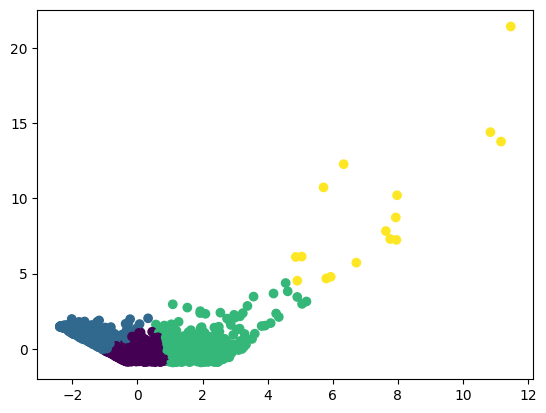

In [ ]:
# Plotting Cluster by Kmeans model
plt.scatter(RFM_PCA[:,0],RFM_PCA[:,1], c = RFM_outliers['KMeans Cluster'])
plt.show()

Clusters are not well separated


A __silhouette score__ is a numerical value that measures how well a data point fits into its cluster and how separated it is from other clusters.

* **Close to +1:** The data points are well-separated from other clusters .

* **Close to 0:** The clusters overlap.

* **Close to -1:** The data points are misclassified.

In [ ]:
# Grouping Kmeans Clusters
RFM_outliers.groupby('KMeans Cluster').agg({'Recency': 'mean',
                            'Frequency': 'mean',
                            'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
                  mean      mean     mean count
KMeans Cluster                                 
0                 54.0      39.0    724.0  2154
1                251.0      20.0    402.0   987
2                 30.0     136.0   2864.0   800
3                 54.0     116.0  37265.0    16

Text(0.5, 1.0, 'Monetary Based Clustering')

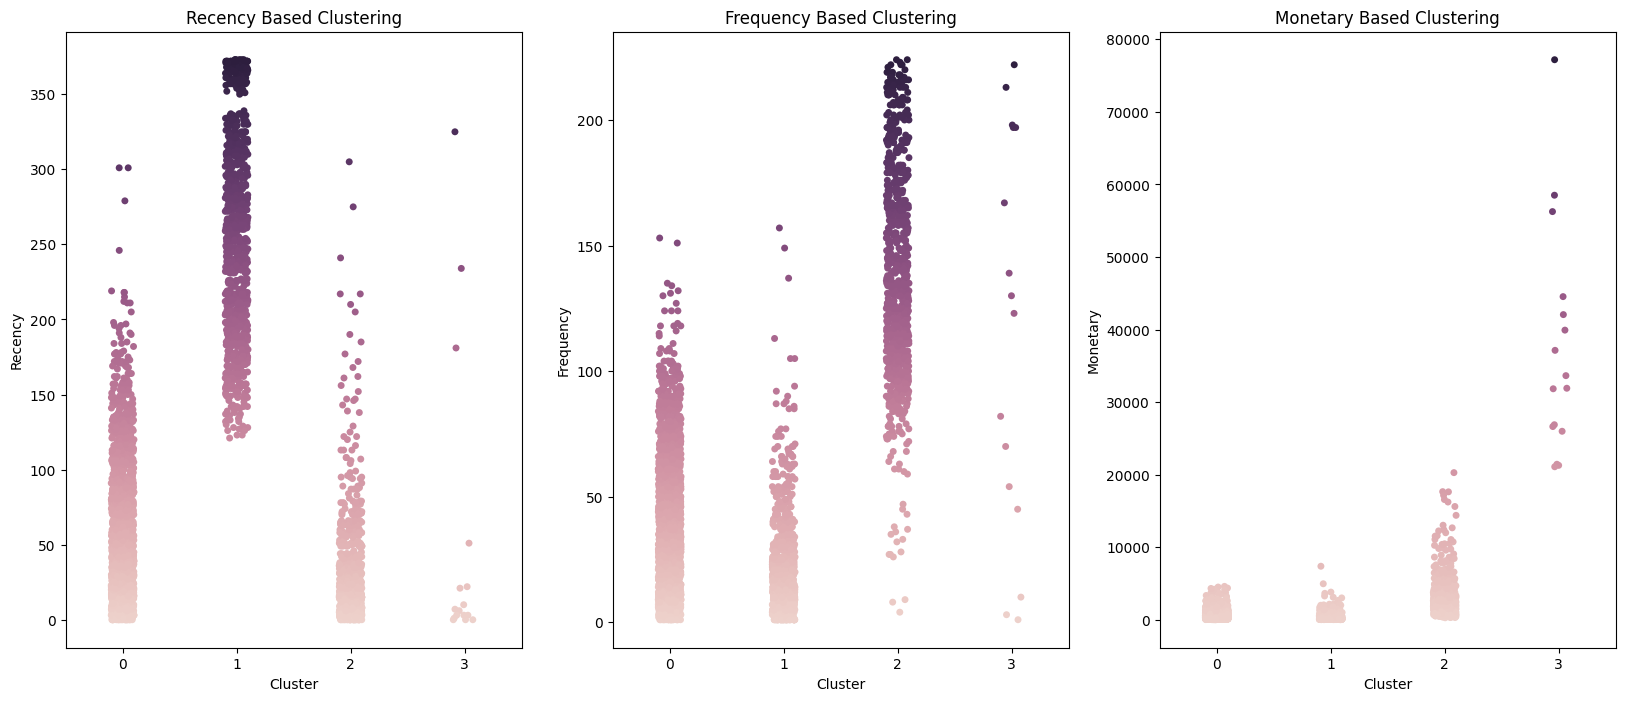

In [ ]:
# Visualizing Customer Segmentation on the basis of Kmeans cluster
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize = (20,8))

ax = sns.stripplot(data=RFM_outliers, x="KMeans Cluster", y="Recency",
                    hue="Recency",legend=False,ax=ax1)

ax1.set_ylabel('Recency')
ax1.set_xlabel('Cluster')
ax1.set_title('Recency Based Clustering')

ax = sns.stripplot(data=RFM_outliers, x="KMeans Cluster", y="Frequency",
                    hue="Frequency",legend=False,ax=ax2)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Cluster')
ax2.set_title('Frequency Based Clustering')

ax =  sns.stripplot(data=RFM_outliers, x="KMeans Cluster", y="Monetary",
                    hue="Monetary",legend=False,ax=ax3)

ax3.set_ylabel('Monetary')
ax3.set_xlabel('Cluster')
ax3.set_title('Monetary Based Clustering')

#### Step 4.2 | Hierarchical Clustering Model

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters by successively merging or splitting them.

* **Agglomerative:** This is a "bottom-up" approach: Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
* **Divisive:** This is a "top-down" approach: All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

Text(0, 0.5, 'Eucledian Distance')

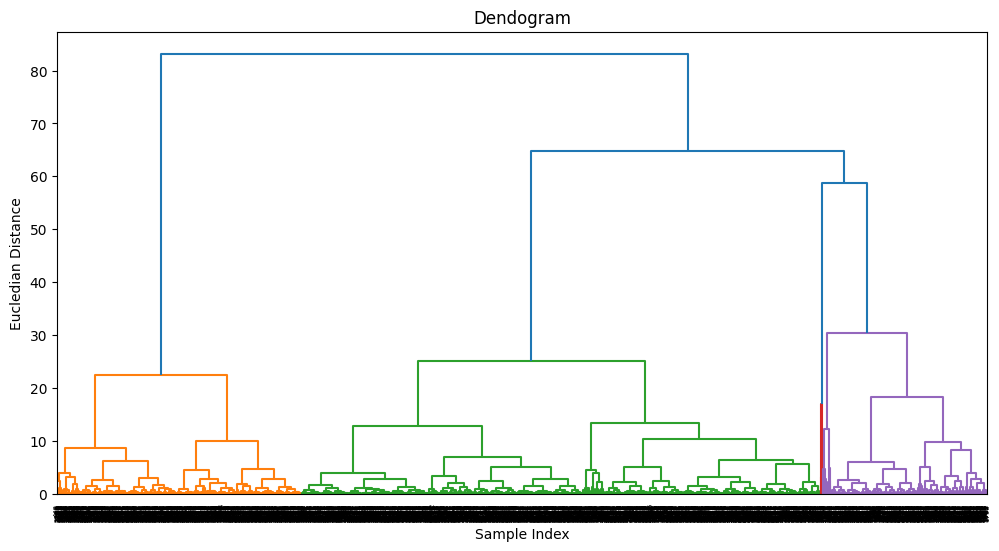

In [ ]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(12,6))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(RFM_PCA,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

From the above dendograms, we found optimal number of clusters(n_clusters) is 4.

In [ ]:
# Fitting Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,linkage='complete')
cluster.fit(RFM_PCA)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
cluster.labels_

array([0, 2, 2, ..., 2, 2, 2])

A __silhouette score__ is a numerical value that measures how well a data point fits into its cluster and how separated it is from other clusters.

* **Close to +1:** The data points are well-separated from other clusters .

* **Close to 0:** The clusters overlap.

* **Close to -1:** The data points are misclassified.

In [ ]:
# Finding Silhouetter Score for Validating Hierarchical Clustering
silhouette_score_Herarchical = silhouette_score(
  RFM_PCA,cluster.fit_predict(RFM_PCA))
silhouette_score_Herarchical

0.7692025678623196

0.77 is near to +1, This indicates that data points are well separated from other cluster.it can increase upto 0.90 but cluster will decrease, this is not suitable for segmentation since customer will not segregate properly

In [ ]:
# Creating Hierarchical Cluster Column
RFM_outliers['Hierarchical Cluster'] = cluster.labels_
RFM_outliers.head()

,Customer ID,Monetary,Frequency,Recency,KMeans Cluster,Hierarchical Cluster
0,12346.0,77183.60,1,325,3,0
1,12347.0,4310.00,182,1,2,2
2,12348.0,1797.24,31,74,0,2
3,12349.0,1757.55,73,18,0,2
4,12350.0,334.40,17,309,1,2


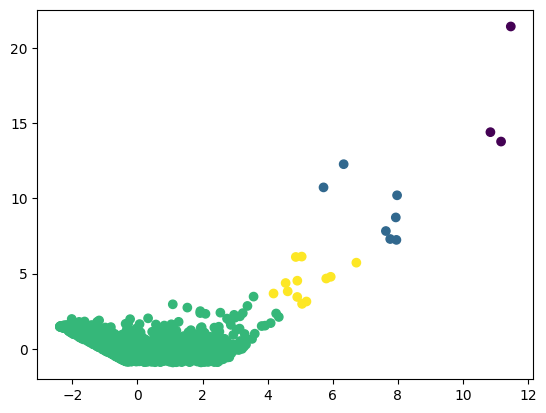

In [ ]:
# Plotting Hierarchical Clustering
plt.scatter(RFM_PCA[:,0],RFM_PCA[:,1],  c=cluster.labels_)
plt.show()

Hierarchical clusters are well separated and its silhouetter score is also near to +1.

In [ ]:
# Grouping Hierarchical Cluster
RFM_outliers.groupby('Hierarchical Cluster').agg({'Recency': 'mean',
                            'Frequency': 'mean',
                            'Monetary': ['mean', 'count'],}).round(0)


Recency Frequency Monetary      
                        mean      mean     mean count
Hierarchical Cluster                                 
0                      110.0      67.0  63982.0     3
1                       65.0     116.0  37289.0     7
2                       99.0      54.0   1053.0  3935
3                       12.0     152.0  20653.0    12

Text(0.5, 1.0, 'Monetary Based Clustering')

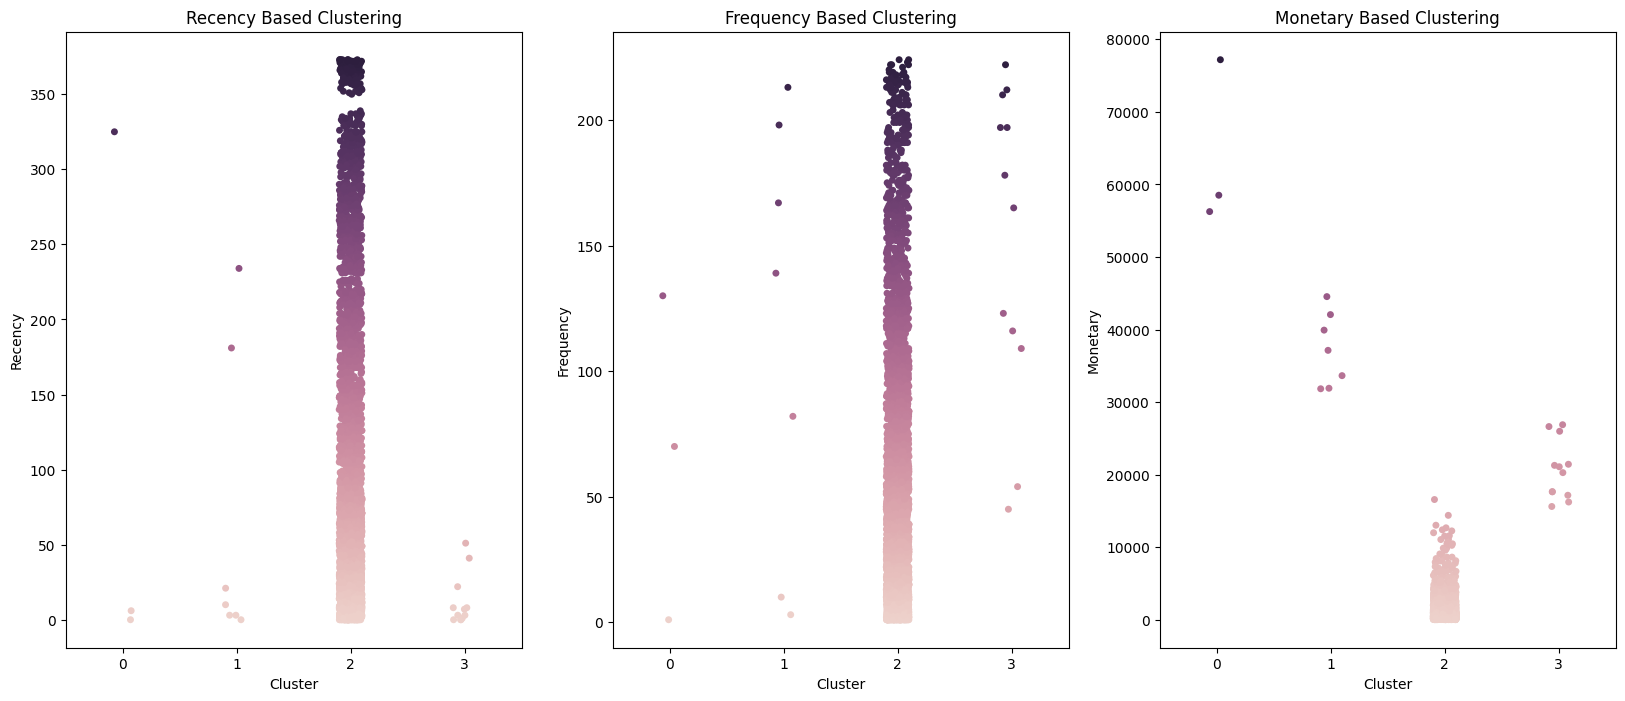

In [ ]:
# Visualizing Customer Segmentation on the basis of Hierarchical cluster

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize = (20,8))

ax = sns.stripplot(data=RFM_outliers, x="Hierarchical Cluster", y="Recency",
                    hue="Recency",legend=False,ax=ax1)

ax1.set_ylabel('Recency')
ax1.set_xlabel('Cluster')
ax1.set_title('Recency Based Clustering')

ax = sns.stripplot(data=RFM_outliers, x="Hierarchical Cluster", y="Frequency",
                    hue="Frequency",legend=False,ax=ax2)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Cluster')
ax2.set_title('Frequency Based Clustering')

ax =  sns.stripplot(data=RFM_outliers, x="Hierarchical Cluster", y="Monetary",
                    hue="Monetary",legend=False,ax=ax3)

ax3.set_ylabel('Monetary')
ax3.set_xlabel('Cluster')
ax3.set_title('Monetary Based Clustering')

#### Step 4.3 | DBSCAN Clustering Model

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a __density-based clustering__ given a set of points in some space, it groups together points that are closely packed (points with many nearby neighbors), and marks as outliers points that lie alone in low-density regions.

In [ ]:
# Fitting the DBSCAN model
DBCAN = DBSCAN(eps=0.5).fit(RFM_PCA)
DBCAN.labels_

array([-1,  0,  0, ...,  0,  0,  0])

A __silhouette score__ is a numerical value that measures how well a data point fits into its cluster and how separated it is from other clusters.

* **Close to +1:** The data points are well-separated from other clusters .

* **Close to 0:** The clusters overlap.

* **Close to -1:** The data points are misclassified.

In [ ]:
# Finding Silhouette Score for Validating DBSCAN Model
silhouette_score_DBSCAN = silhouette_score(
  RFM_PCA,DBSCAN(eps=0.5,).fit_predict(RFM_PCA))
silhouette_score_DBSCAN

0.8065972730378526

0.80 is near to +1, This indicates that data points are well separated from other cluster but we will not consider for final model because 2 clusters are not properly segregate potential customers.

In [ ]:
# Creating DBSCAN Cluster model
RFM_outliers['DBSCAN Cluster'] = DBCAN.labels_
RFM_outliers.head()

,Customer ID,Monetary,Frequency,Recency,KMeans Cluster,Hierarchical Cluster,DBSCAN Cluster
0,12346.0,77183.60,1,325,3,0,-1
1,12347.0,4310.00,182,1,2,2,0
2,12348.0,1797.24,31,74,0,2,0
3,12349.0,1757.55,73,18,0,2,0
4,12350.0,334.40,17,309,1,2,0


In [ ]:
# Grouping DBSCAN Cluster Column
RFM_outliers.groupby('DBSCAN Cluster').agg({'Recency': 'mean',
                            'Frequency': 'mean',
                            'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
                  mean      mean     mean count
DBSCAN Cluster                                 
-1                47.0     129.0  25031.0    33
 0                99.0      53.0   1024.0  3924

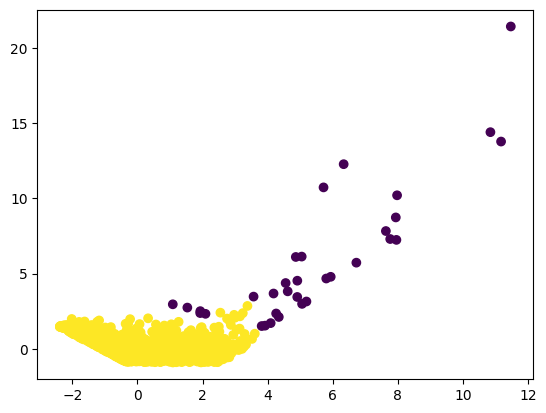

In [ ]:
# Plotting Clusters by DBSCAN Model
plt.scatter(RFM_PCA[:,0],RFM_PCA[:,1], c=DBCAN.labels_)
plt.show()

DBSCAN clusters are well separated but not segregate customer properly in 2 clusters.

Text(0.5, 1.0, 'Monetary Based Clustering')

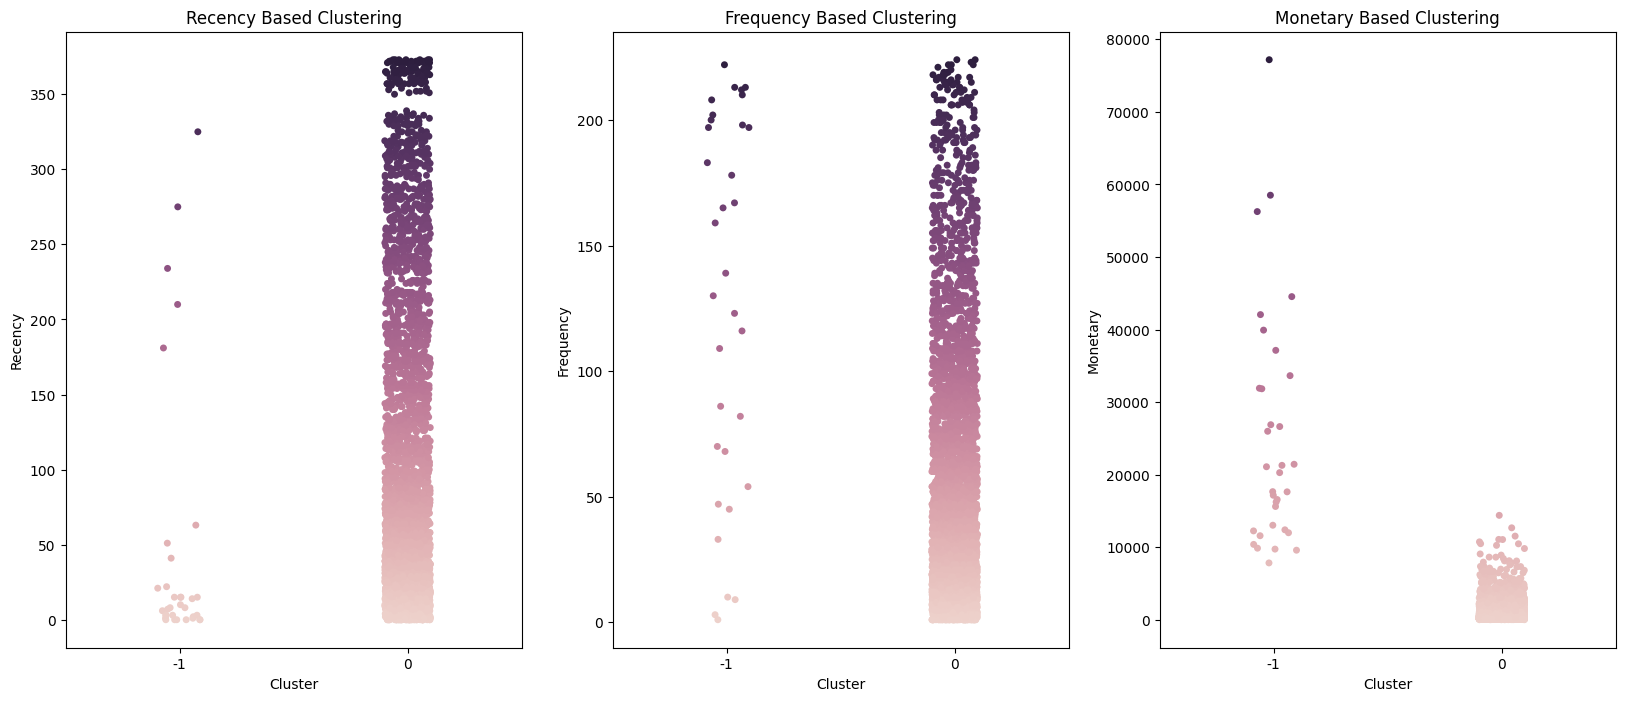

In [ ]:
# Visualizing Customer Segmentation on the basis of DBSCAN Cluster

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize = (20,8))

ax = sns.stripplot(data=RFM_outliers, x="DBSCAN Cluster", y="Recency",
                    hue="Recency",legend=False,ax=ax1)

ax1.set_ylabel('Recency')
ax1.set_xlabel('Cluster')
ax1.set_title('Recency Based Clustering')

ax = sns.stripplot(data=RFM_outliers, x="DBSCAN Cluster", y="Frequency",
                    hue="Frequency",legend=False,ax=ax2)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Cluster')
ax2.set_title('Frequency Based Clustering')

ax =  sns.stripplot(data=RFM_outliers, x="DBSCAN Cluster", y="Monetary",
                    hue="Monetary",legend=False,ax=ax3)

ax3.set_ylabel('Monetary')
ax3.set_xlabel('Cluster')
ax3.set_title('Monetary Based Clustering')

In [ ]:
# Define the filename for pickle file
Filename = 'Hierarchical_model_pkl'

# Open file in write mode
with open('Hierarchical_model_pkl','wb') as file:
  # Save the Hierarchical model to the file
  pickle.dump(cluster, file)

# Close the file
file.close()

pickle.dump(cluster, open('Hierarchical_model_pkl','wb'))


**Conclusion**

* The results indicated that the Hierarchical Clusters are well separated and its score is close to +1.Hence it is our final model.

* More clusters can segregate customers better based on their purchase history.

* Marketing strategies can be make efficiently by dividing customers into more than 2 segments.

* Different Segments can be targeted by different marketing strategies which will decrease our marketing cost.

